### Firnanda Putra Agustinus (2213020150)
### Robert

In [79]:
# Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Baca gambar dengan OpenCV (dalam BGR)
gambar = cv2.imread('doraemon.jpg')

In [81]:
# Ubah BGR ke RGB
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

In [82]:
# Ambil dimensi gambar
tinggi, lebar, _ = gambar_rgb.shape

In [83]:
# Ubah ke array
rgb = np.array(gambar_rgb)
rgb

array([[[  0, 169, 238],
        [  0, 169, 238],
        [  0, 169, 238],
        ...,
        [  0, 169, 238],
        [  0, 169, 238],
        [  0, 169, 238]],

       [[  0, 169, 238],
        [  0, 169, 238],
        [  0, 169, 238],
        ...,
        [  0, 169, 238],
        [  0, 169, 238],
        [  0, 169, 238]],

       [[  0, 169, 236],
        [  0, 169, 236],
        [  0, 169, 236],
        ...,
        [  0, 169, 236],
        [  0, 169, 236],
        [  0, 169, 236]],

       ...,

       [[146, 209, 201],
        [139, 202, 194],
        [150, 213, 205],
        ...,
        [142, 199, 128],
        [142, 200, 126],
        [142, 200, 126]],

       [[147, 209, 204],
        [141, 203, 198],
        [149, 211, 206],
        ...,
        [141, 199, 125],
        [141, 199, 123],
        [141, 199, 123]],

       [[148, 210, 205],
        [143, 205, 200],
        [146, 208, 203],
        ...,
        [141, 199, 125],
        [141, 199, 123],
        [141, 199, 123]]

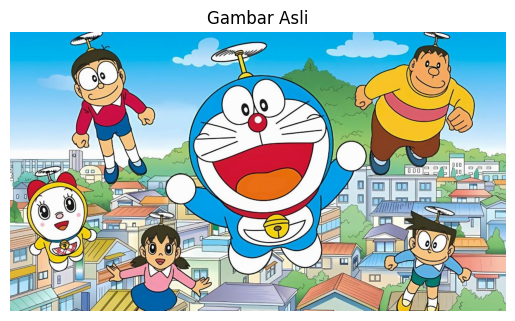

In [84]:
# Tampilkan gambar asli
plt.imshow(gambar_rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

In [85]:
# Fungsi manual konversi ke grayscale
def convert_to_grayscale(pixel):
    r, g, b = pixel
    return int(0.299 * r + 0.587 * g + 0.114 * b)

In [74]:
grayscale_img = []
for y in range(tinggi):
    row = []
    for x in range(lebar):
        pixel = rgb[y, x]
        gray_val = convert_to_grayscale(pixel)
        row.append(gray_val)
    grayscale_img.append(row)

# Konversi ke numpy array bertipe uint8
grayscale_img = np.array(grayscale_img, dtype=np.uint8)

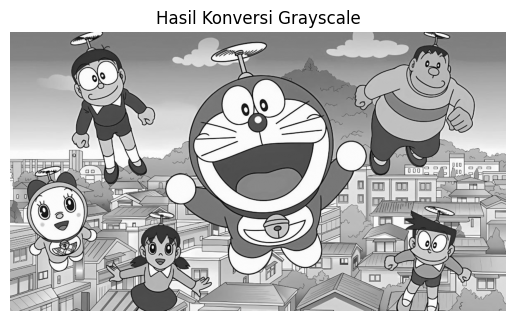

In [ ]:
# Tampilan Gambar Greyscale
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Hasil Konversi Grayscale')
plt.show()

## Deteksi Tepi – Robert
**Robert** memakai dua kernel 2×2 untuk menghitung gradien diagonal. Lebih peka terhadap noise sehingga cocok untuk gambar yang cukup bersih.

In [ ]:
# Operasi Robert Manual
def apply_robert_operator(img):
    
    # Pastikan input adalah array 2D (grayscale)
    tinggi, lebar = img.shape
    gradient_magnitude = np.zeros((tinggi, lebar), dtype=np.uint8)

    # Definisi kernel Roberts
    Gx = np.array([[1, 0], [0, -1]])
    Gy = np.array([[0, 1], [-1, 0]])

    for y in range(tinggi - 1):
        for x in range(lebar - 1):
            gx = 0
            gy = 0

            # Kernel 2x2
            for i in range(2):
                for j in range(2):
                    pixel = int(img[y + i, x + j])
                    gx += Gx[i][j] * pixel
                    gy += Gy[i][j] * pixel

            magnitude = math.sqrt(gx**2 + gy**2)
            gradient_magnitude[y, x] = min(int(magnitude), 255)

    return gradient_magnitude

In [93]:
# Gabungkan gradien
edges_roberts = np.sqrt(robertsx.astype(float)**2 + robertsy.astype(float)**2)
edges_roberts = np.uint8(edges_roberts / edges_roberts.max() * 255)
edges_roberts

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [14, 14,  0, ...,  1,  0,  0],
       [ 4,  4,  7, ...,  0,  1,  2],
       [ 2,  2,  4, ...,  0,  0,  0]], shape=(675, 1200), dtype=uint8)

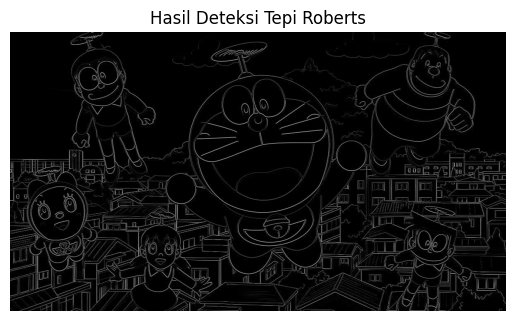

In [94]:
# Tampilkan hasil
plt.imshow(edges_roberts, cmap='gray')
plt.title('Hasil Deteksi Tepi Roberts')
plt.axis('off')
plt.show()